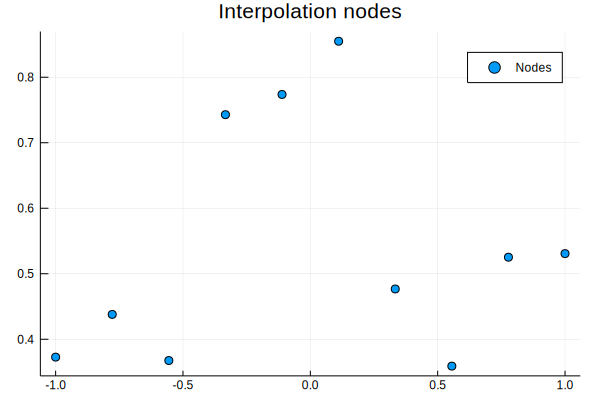

In [22]:
using DataFrames
using CSV
using Plots
using Polynomials
using Interpolations
using Statistics
using Images, Colors, ImageMagick, ImageView, TestImages


X = LinRange(-1, 1, 10)
Y = [rand() for x in X]
xsf = LinRange(-1, 1, 1000)
xs = LinRange(1, length(X), 1000)
s = scatter(X, Y, label="Nodes", title="Interpolation nodes")
savefig(s, "Interpolation_nodes.svg")
s

In [5]:
function lagrange(X::AbstractArray, Y::AbstractArray, x::Number)
    k = length(X)
    return sum([reduce(*, [(x - X[m])/(X[j] - X[m]) for m in 1:k if m != j]) * Y[j] for j in 1:k])
end
                            
function lagrange(X::AbstractArray, Y::AbstractArray, xx::AbstractArray)
    return [lagrange(X, Y, x) for x in xx]
end

lagrange (generic function with 2 methods)

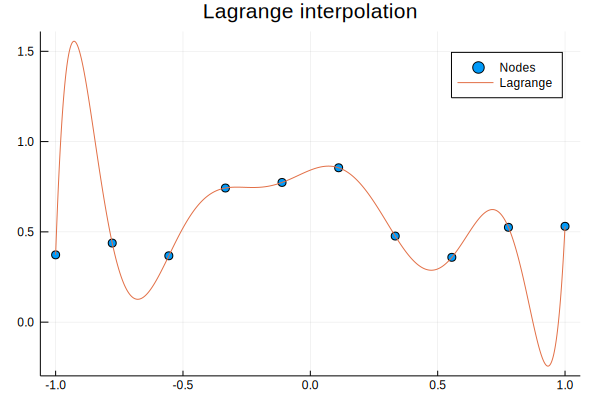

In [23]:
LY = lagrange(X, Y, xsf)
s = scatter(X, Y, label="Nodes", title = "Lagrange interpolation")
plot!(xsf, LY, label = "Lagrange")
savefig(s, "Lagrange_interpolation.svg")
s

In [24]:
function divdif(X::AbstractArray, Y::AbstractArray)
    n = length(X)
    d = convert(Array{Float64,1}, deepcopy(Y))
    for i=2:n
        for j=1:i-1
            d[i] = (d[j] - d[i])/(X[j] - X[i])
        end
    end
    return d
end

function newtonform(X::AbstractArray, d::AbstractArray, x::Number) 
    n = length(d)
    result = d[n]
    for i=n-1:-1:1
        result = result * (x - X[i]) + d[i]
    end
    return result
end

function newton(X::AbstractArray, Y::AbstractArray, x::Number)
    divided = divdif(X, Y)
    result = newtonform(X, divided, x)
    return result
end

function newton(X::AbstractArray, Y::AbstractArray, xx::AbstractArray)
    divided = divdif(X, Y)
    results = [newtonform(X, divided, x) for x in xx]
    return results
end

newton (generic function with 2 methods)

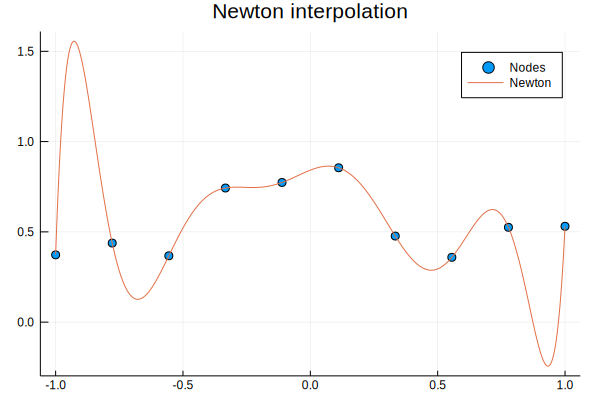

In [25]:
NY = newton(X, Y, xsf)
s = scatter(X, Y, label="Nodes", title = "Newton interpolation")
plot!(xsf, NY, label = "Newton")
savefig(s, "Newton_interpolation.svg")
s

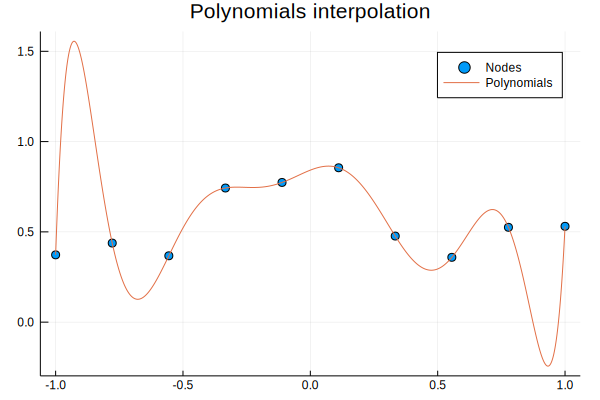

In [26]:
poly = polyfit(X, Y, length(X) - 1)
PY = polyval(poly, xsf)
s = scatter(X, Y, label="Nodes", title = "Polynomials interpolation")
plot!(xsf, PY, label = "Polynomials")
savefig(s, "Polynomials_interpolation.svg")
s

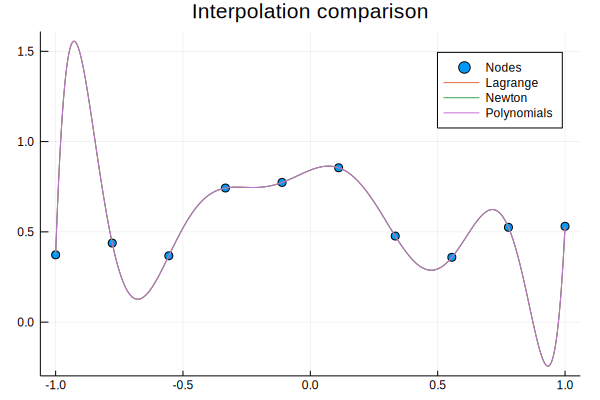

In [27]:
s = scatter(X, Y, label="Nodes", title = "Interpolation comparison")
plot!(xsf, LY, label = "Lagrange")
plot!(xsf, NY, label = "Newton")
plot!(xsf, PY, label = "Polynomials")
savefig(s, "Interpolation_comparison.svg")
s

10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
30 1
30 2
30 3
30 4
30 5
30 6
30 7
30 8
30 9
30 10
40 1
40 2
40 3
40 4
40 5
40 6
40 7
40 8
40 9
40 10
50 1
50 2
50 3
50 4
50 5
50 6
50 7
50 8
50 9
50 10
60 1
60 2
60 3
60 4
60 5
60 6
60 7
60 8
60 9
60 10
70 1
70 2
70 3
70 4
70 5
70 6
70 7
70 8
70 9
70 10
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
90 1
90 2
90 3
90 4
90 5
90 6
90 7
90 8
90 9
90 10
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
110 1
110 2
110 3
110 4
110 5
110 6
110 7
110 8
110 9
110 10
120 1
120 2
120 3
120 4
120 5
120 6
120 7
120 8
120 9
120 10
130 1
130 2
130 3
130 4
130 5
130 6
130 7
130 8
130 9
130 10
140 1
140 2
140 3
140 4
140 5
140 6
140 7
140 8
140 9
140 10
150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
150 10
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
170 1
170 2
170 3
170 4
170 5
170 6
170 7
170 8
170 9
170 10
180 1
180 2
180 3
180 4
180 5
180 6
180 7
180 8
180 9

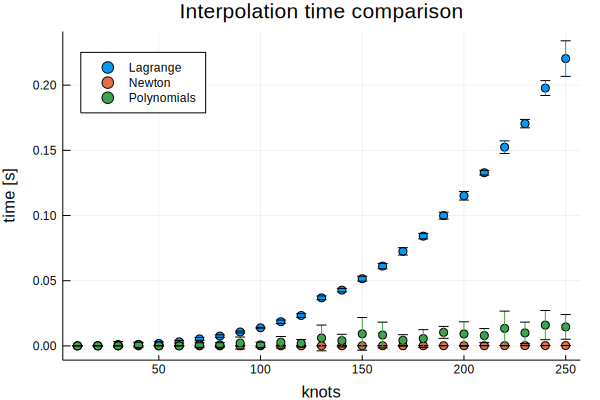

In [28]:
function times()
    df = DataFrame(Knots = Int64[], Fun = String[], Time = Float64[])
    for l in 10:10:250
        for i in 1:10
            x = LinRange(-1, 1, l)
            y = [rand() for _ in x]
            push!(df, [l, "Polynomials", (@elapsed polyval(polyfit(x, y, length(x) - 1), x))])
            push!(df, [l, "Newton", (@elapsed newton(x, y, x))])
            push!(df, [l, "Lagrange", (@elapsed lagrange(x, y, x))])
            println(l, " ",  i)
        end
    end
    return df
end

d = aggregate(times(), [:Knots, :Fun], [mean, std])
s = scatter(d[:Knots], 
    d[:Time_mean], 
    group = d[:Fun], 
    yerr = d[:Time_std], 
    legend = :topleft,
    title = "Interpolation time comparison",
    ylabel = "time [s]", 
    xlabel = "knots")
savefig(s, "Interpolation_time_comparison.svg")
s

----------------------------------------------------------------------------------

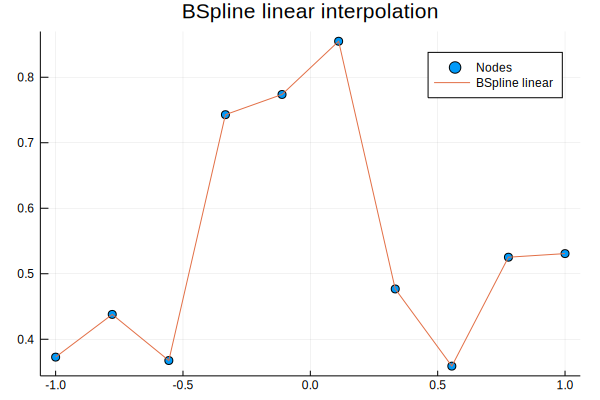

In [29]:
litp = interpolate(Y, BSpline(Linear()))
L = litp(xs)
s = scatter(X, Y, label="Nodes", title = "BSpline linear interpolation")
plot!(xsf, L, label="BSpline linear")
savefig(s, "BSpline_linear_interpolation.svg")
s

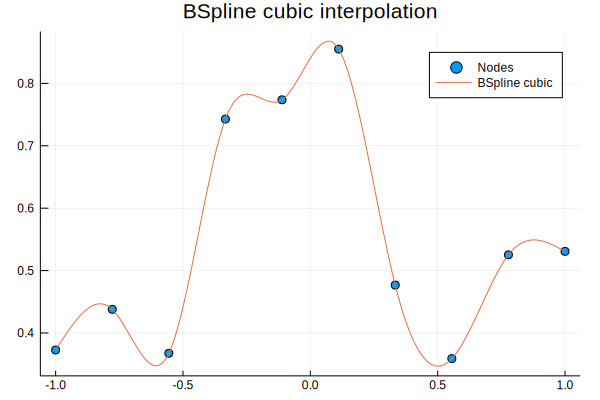

In [30]:
citp = interpolate(Y, BSpline(Cubic(Line(OnGrid()))))
C=citp(LinRange(1, length(X), 1000))
s = scatter(X,Y, label="Nodes", title = "BSpline cubic interpolation")
plot!(xsf,C, label="BSpline cubic")
savefig(s, "BSpline_cubic_interpolation.svg")
s

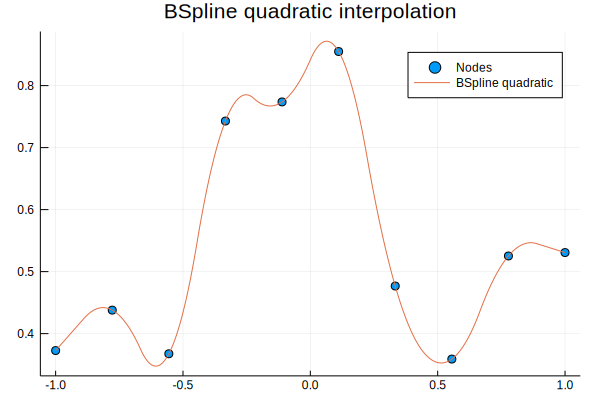

In [31]:
qitp = interpolate(Y, BSpline(Quadratic(Line(OnCell()))))
Q=qitp(LinRange(1, length(X), 1000))
s = scatter(X,Y, label="Nodes", title = "BSpline quadratic interpolation")
plot!(xsf,Q, label="BSpline quadratic")
savefig(s, "BSpline_quadratic_interpolation.svg")
s

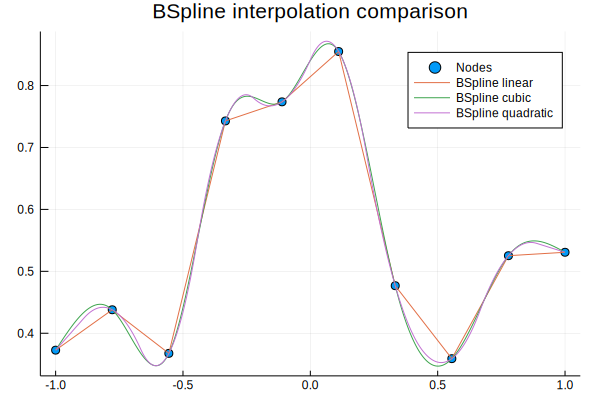

In [32]:
s = scatter(X,Y, label="Nodes", title = "BSpline interpolation comparison")
plot!(xsf, L, label="BSpline linear")
plot!(xsf,C, label="BSpline cubic")
plot!(xsf,Q, label="BSpline quadratic")
savefig(s, "BSpline_interpolation_comparison.svg")
s

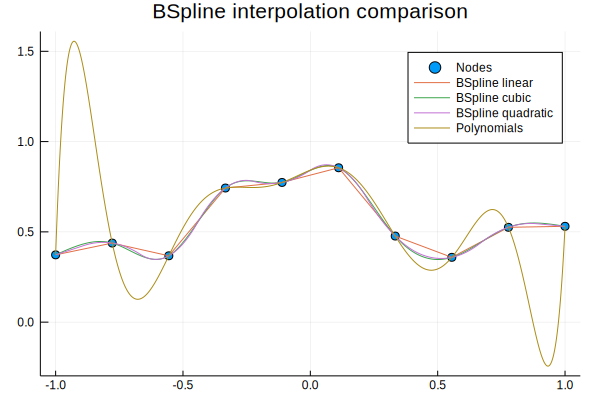

In [34]:
s = scatter(X,Y, label="Nodes", title = "BSpline interpolation comparison")
plot!(xsf, L, label="BSpline linear")
plot!(xsf,C, label="BSpline cubic")
plot!(xsf,Q, label="BSpline quadratic")
plot!(xsf, PY, label = "Polynomials")
savefig(s, "BSpline_Polynomials_interpolation_comparison.svg")
s

---------------------------------------------------------

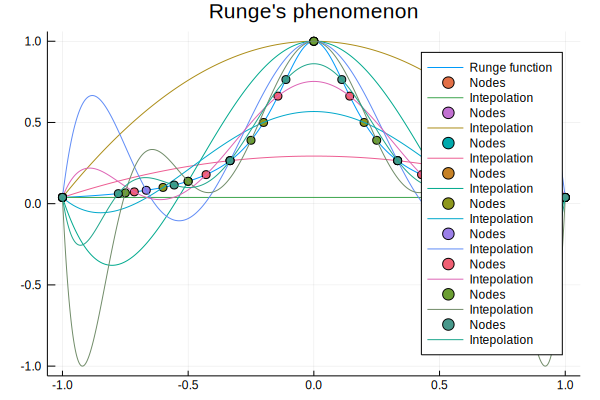

In [14]:
runge(x) = 1/(1+25*x^2)

i = 5
p = plot(xsf, map(runge, xsf), label = "Runge function",title = string("Runge's phenomenon (Nodes = ", i, ""))
RX = LinRange(-1, 1, i)
RY = map(runge, RX)
scatter!(RX, RY, label = "Nodes")

rpoly = polyfit(RX, RY, length(RX) - 1)
R = polyval(rpoly, xsf)
plot!(xsf, R, label = "Intepolation")
savefig(p, string("Runge",i,".svg"))

p

--------------------------------------------

In [403]:
function nearest(A::Matrix, xfactor::Number, yfactor::Number)
    lx, ly = size(A)
    nx, ny = round.(Int, (xfactor * lx, yfactor * ly))
    vx, vy = LinRange(0.5, lx + 0.5, nx), LinRange(0.5, ly+0.5, ny)
    itp = interpolate(A, BSpline(Constant()))
    etpf = extrapolate(itp, Flat())
    return etpf(collect(vx), collect(vy))
end

nearest (generic function with 1 method)

In [404]:
function bilinear(A::Matrix, xfactor::Number, yfactor::Number)
    lx, ly = size(A)
    nx, ny = round.(Int,  (xfactor * lx, yfactor * ly))
    vx, vy = LinRange(0.5, lx + 0.5, nx), LinRange(0.5, ly+0.5, ny)
    itp = interpolate(A, BSpline(Linear()))
    etpf = extrapolate(itp, Flat())
    return etpf(collect(vx), collect(vy))
end

bilinear (generic function with 1 method)

In [405]:
function bicubic(A::Matrix, xfactor::Number, yfactor::Number)
    lx, ly = size(A)
    nx, ny = round.(Int, (xfactor * lx, yfactor * ly))
    vx, vy = LinRange(0.5, lx + 0.5, nx), LinRange(0.5, ly+0.5, ny)
    itp = interpolate(A, BSpline(Cubic(Line(OnGrid()))))
    etpf = extrapolate(itp, Flat())
    return etpf(collect(vx), collect(vy))
end

bicubic (generic function with 1 method)

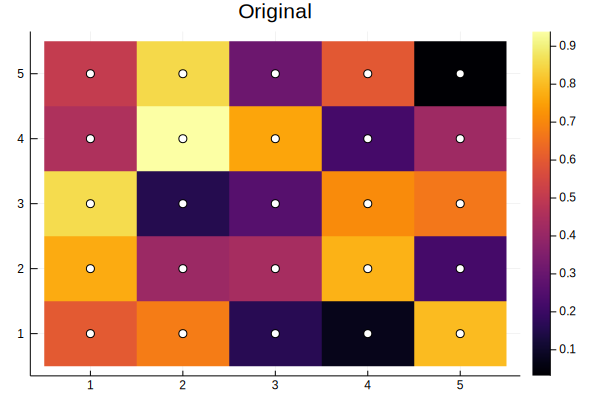

In [406]:
img = rand(Float32, 5, 5)
f = heatmap(img, title = "Original")
scatter!(repeat(1:5,1, 5), transpose(repeat(1:5,1, 5)), legend=false, color = :white)
savefig(f, "Original.svg")
f

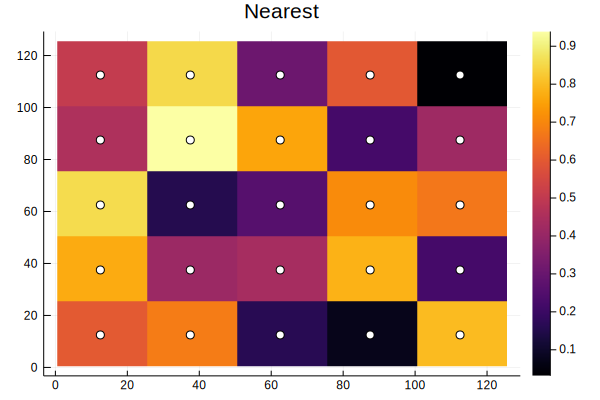

In [408]:
scale = 25
f = heatmap(nearest(img, scale, scale), title = "Nearest")
scatter!(repeat(1:5,1, 5)*scale-fill(scale/2,5,5), transpose(repeat(1:5,1, 5)*scale-fill(scale/2,5,5)), legend=false, color = :white)
savefig(f, "Nearest.svg")
f

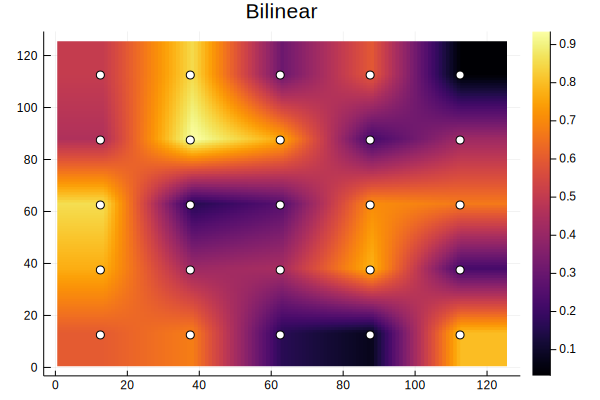

In [409]:
scale = 25
f = heatmap(bilinear(img, 25, 25), title = "Bilinear")
scatter!(repeat(1:5,1, 5)*scale-fill(scale/2,5,5), transpose(repeat(1:5,1, 5)*scale-fill(scale/2,5,5)), legend=false, color = :white)
savefig(f, "Bilinear.svg")
f

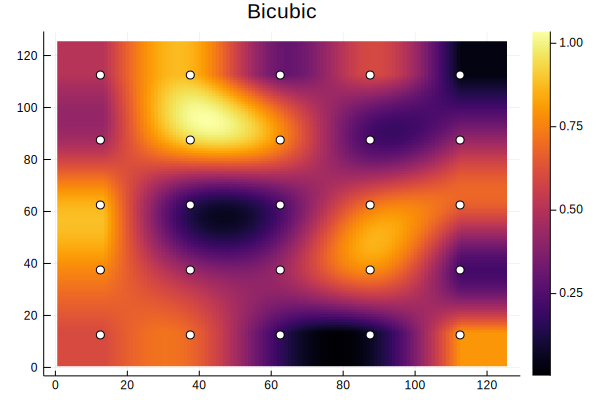

In [410]:
scale = 25
f = heatmap(bicubic(img, 25, 25), title = "Bicubic")
scatter!(repeat(1:5,1, 5)*scale-fill(scale/2,5,5), transpose(repeat(1:5,1, 5)*scale-fill(scale/2,5,5)), legend=false, color = :white)
savefig(f, "Bicubic.svg")
f